In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder

In [58]:
data = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Data Visualization\DoAn\ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
data

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [7]:
data.describe(include=[float])

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
data.describe(include=[object])

,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1401,1866,2015,2067,1726,1765,1580,351


# Biểu đồ phân phối biến định lượng

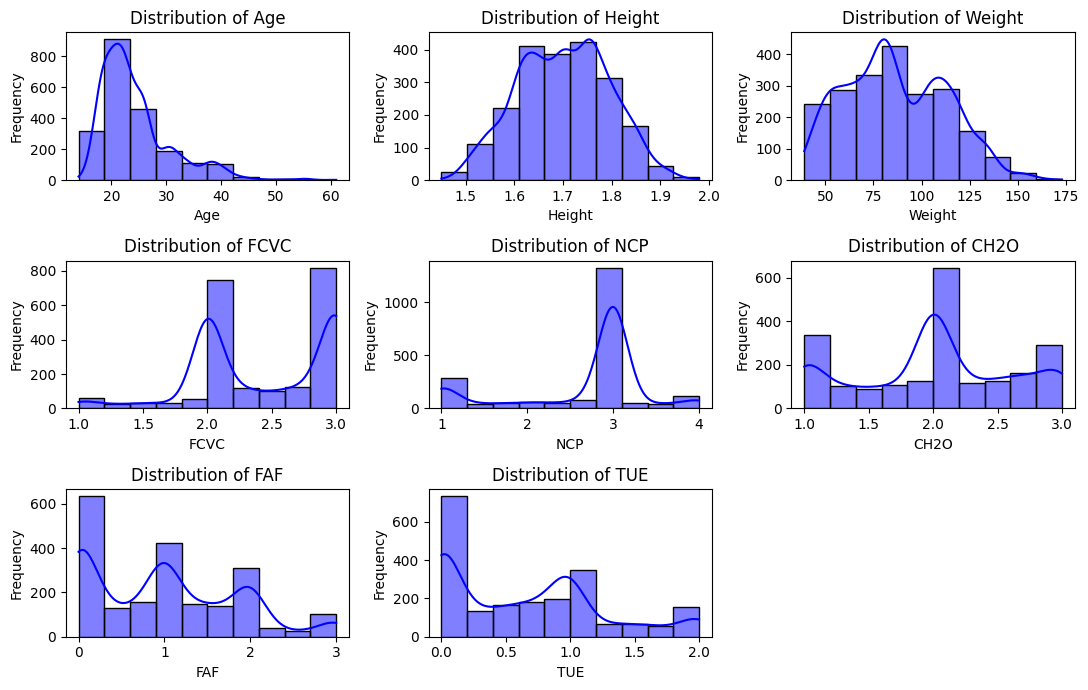

In [9]:
# Lọc các cột có kiểu dữ liệu float
float_columns = data.select_dtypes(include=['float']).columns

plt.figure(figsize=(11, 7))

for i, col in enumerate(float_columns, 1):
    plt.subplot(3, 3, i)
    sb.histplot(data[col], kde=True, bins=10, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Biểu đồ phân phối biến định tính

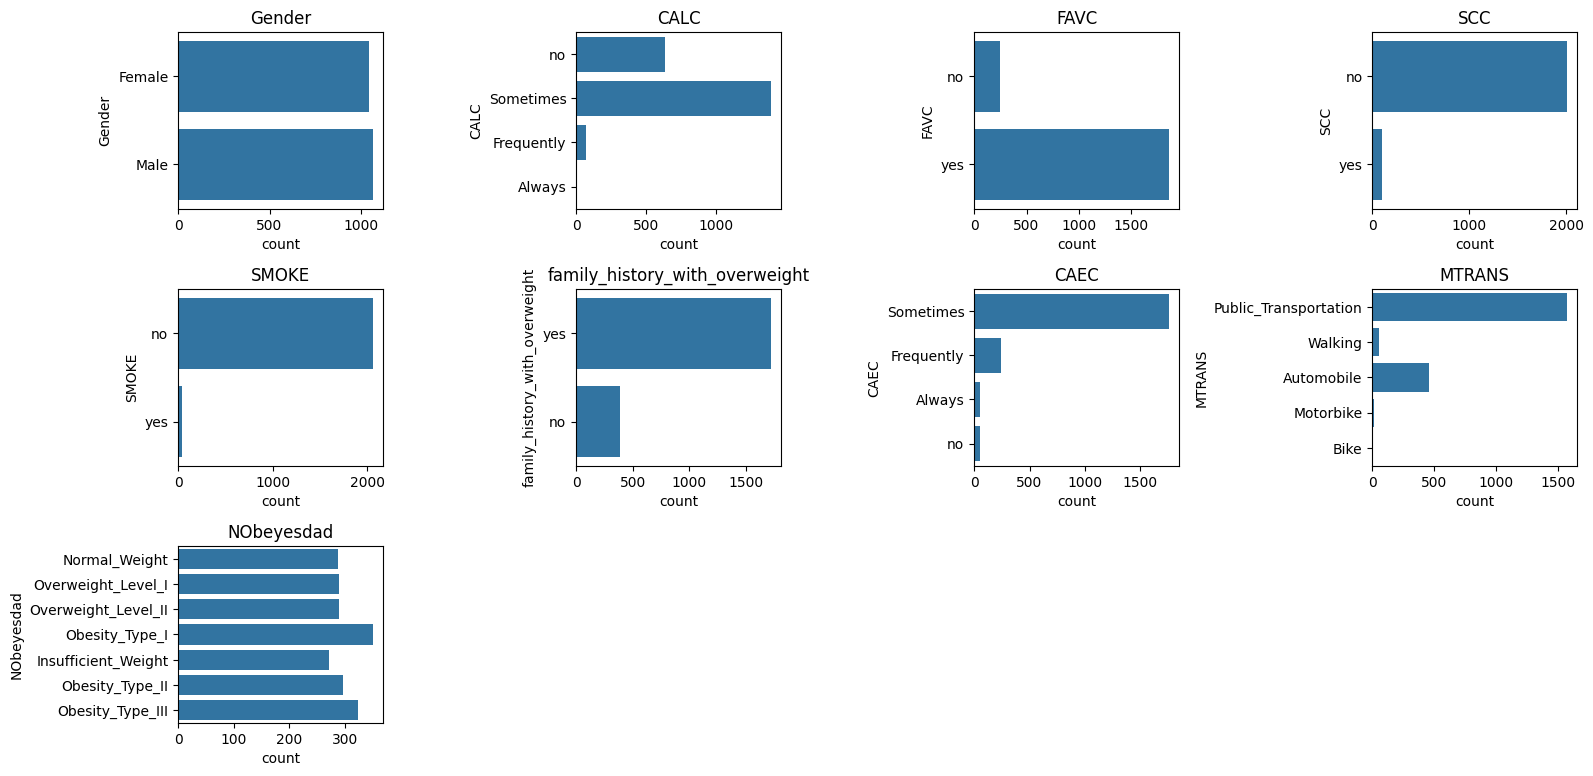

In [14]:
cat_col = data.select_dtypes(include=['object', 'int64'])
# Vẽ biểu đồ cho các biến định tính
plt.figure(figsize=(16, 10))  # Thay đổi kích thước figsize nếu cần

for i, col in enumerate(cat_col.columns):
  plt.subplot(4, 4, i+1) # điều chỉnh subplot dựa trên số lượng biến định tính
  sb.countplot(y=col, data=data) # vẽ countplot theo chiều dọc
  #plt.xticks(rotation=45)
  plt.title(col)
plt.tight_layout()
plt.show()

# Biểu đồ tương quan

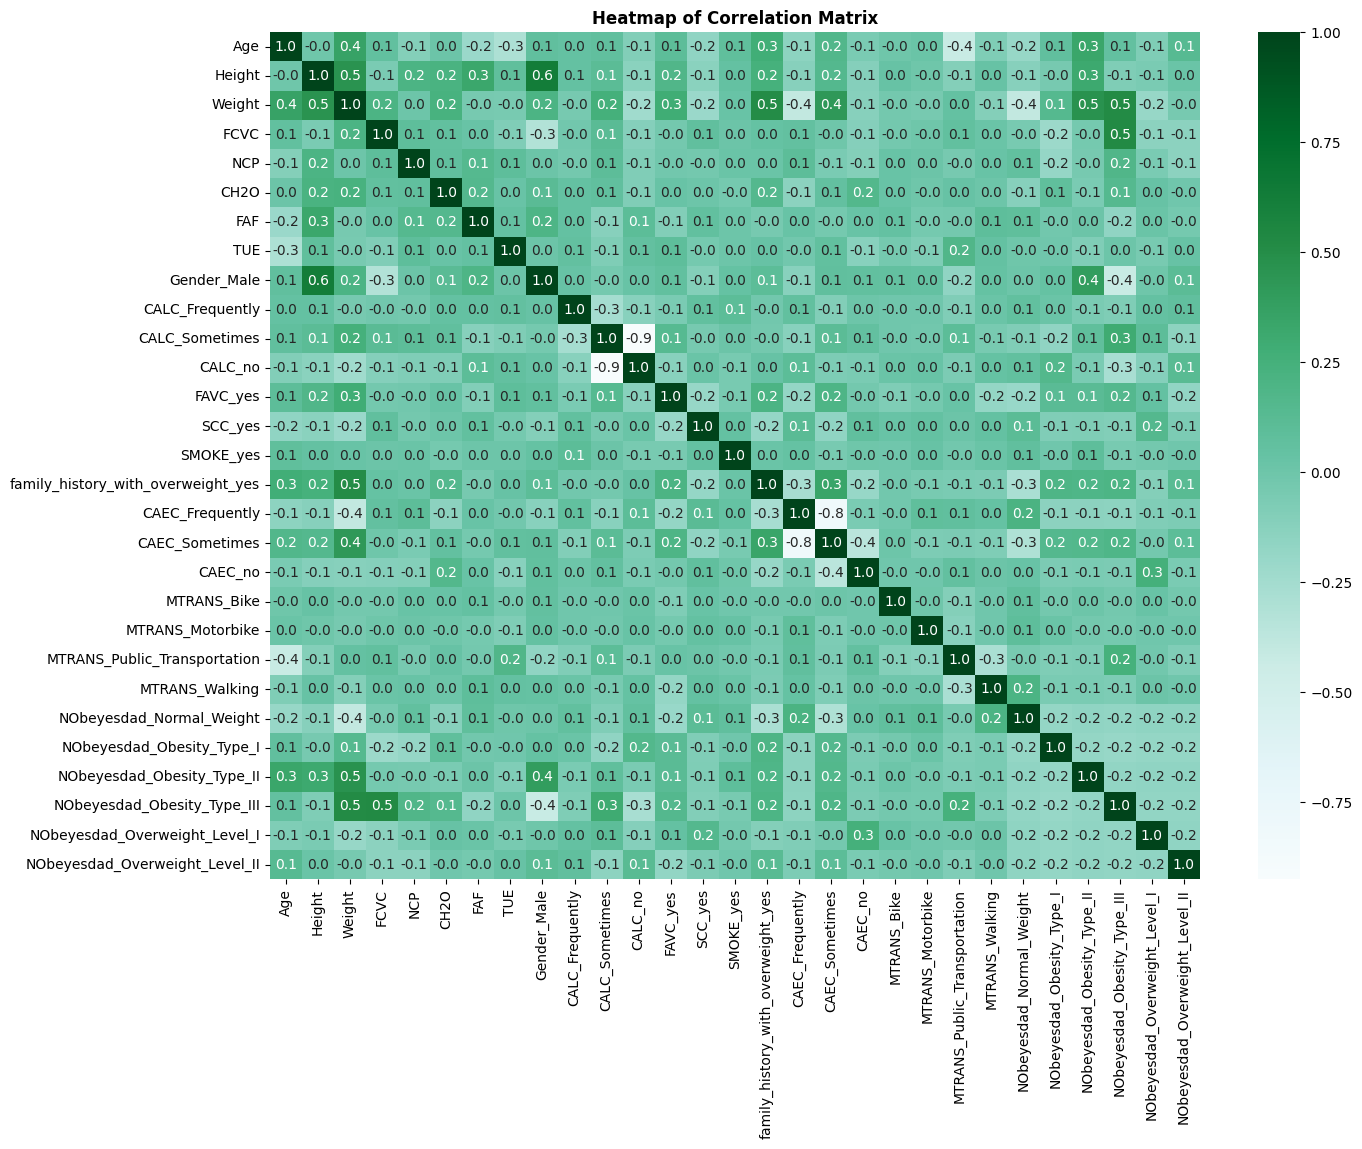

In [62]:
# Creating Dummy Columns
df_dummies = pd.get_dummies(data, drop_first=True, dtype='int64')

# Calculating correlation matrix
correlation_matrix = df_dummies.corr(method = 'spearman')

# Plotting heatmap
plt.figure(figsize=(15, 11))
sb.heatmap(correlation_matrix, annot=True, cmap='BuGn', fmt=".1f")
plt.title('Heatmap of Correlation Matrix', weight='bold')
plt.show()

In [63]:
# Lọc các cặp có hệ số tương quan cao (trên 0.4) và loại bỏ chính nó
high_corr_pairs = correlation_matrix.unstack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[
    (high_corr_pairs['Feature 1'] != high_corr_pairs['Feature 2']) & (high_corr_pairs['Correlation'] > 0.4)
]

# Loại bỏ các cặp trùng lặp bất kể thứ tự (Feature 1, Feature 2)
high_corr_pairs['Pair'] = high_corr_pairs.apply(
    lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1
)
high_corr_pairs = high_corr_pairs.drop_duplicates(subset='Pair').drop(columns='Pair')
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

high_corr_pairs

,Feature 1,Feature 2,Correlation
37,Height,Gender_Male,0.627821
113,FCVC,NObeyesdad_Obesity_Type_III,0.523639
84,Weight,NObeyesdad_Obesity_Type_III,0.515499
73,Weight,family_history_with_overweight_yes,0.509521
83,Weight,NObeyesdad_Obesity_Type_II,0.466088
31,Height,Weight,0.462548
75,Weight,CAEC_Sometimes,0.426326


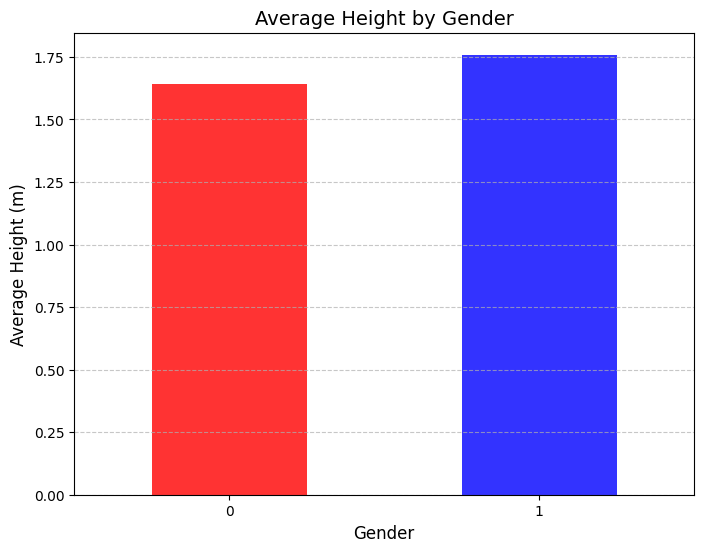

In [45]:
# Tính chiều cao trung bình theo giới tính
avg_height_by_gender = data.groupby("Gender")["Height"].mean()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
avg_height_by_gender.plot(kind="bar", color=["red", "blue"], alpha=0.8)

# Tuỳ chỉnh biểu đồ
plt.title("Average Height by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Height (m)", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 800x600 with 0 Axes>

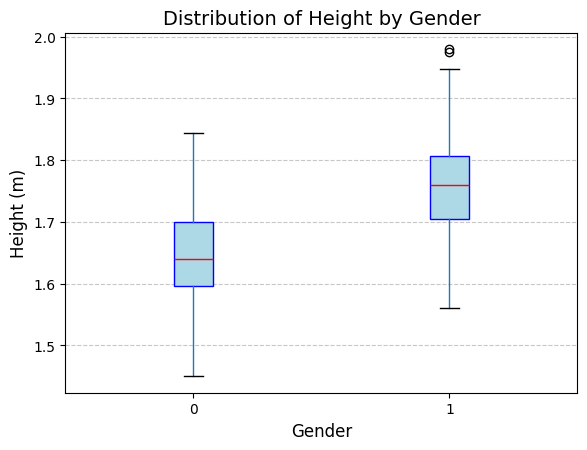

In [48]:
# Vẽ biểu đồ hộp (boxplot) thể hiện sự phân tán chiều cao theo giới tính
plt.figure(figsize=(8, 6))
data.boxplot(column="Height", by="Gender", grid=False, patch_artist=True, 
           boxprops=dict(facecolor="lightblue", color="blue"), medianprops=dict(color="red"))

# Tuỳ chỉnh biểu đồ
plt.title("Distribution of Height by Gender", fontsize=14)
plt.suptitle("")  # Xóa tiêu đề mặc định của matplotlib
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Height (m)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16984\2604774957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.stripplot(x="Gender", y="Height", data=data, jitter=True, palette={"Male": "blue", "Female": "red"}, alpha=0.6)


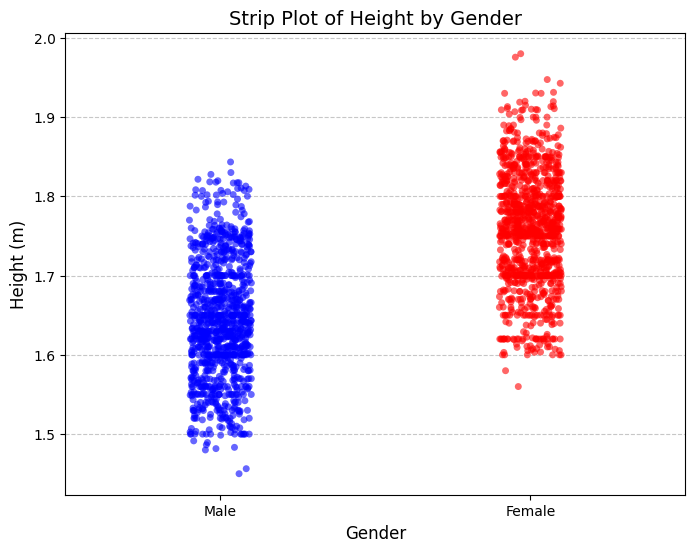

In [50]:
# Chuẩn hóa giá trị trong cột Gender
data['Gender'] = data['Gender'].replace({0: 'Male', 1: 'Female'})

# Vẽ strip plot
plt.figure(figsize=(8, 6))
sb.stripplot(x="Gender", y="Height", data=data, jitter=True, palette={"Male": "blue", "Female": "red"}, alpha=0.6)

# Tùy chỉnh biểu đồ
plt.title("Strip Plot of Height by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Height (m)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [61]:
df = pd.DataFrame(data)

# Vẽ scatter plot
plt.figure(figsize=(8, 6))
sb.scatterplot(x="Gender", y="Height", hue="Obesity_Level", data=df, palette="Set1", s=100)

# Tùy chỉnh biểu đồ
plt.title("Scatter Plot of Height by Gender and Obesity Level", fontsize=14)
plt.xlabel("Gender (0 = Female, 1 = Male)", fontsize=12)
plt.ylabel("Height (m)", fontsize=12)
plt.legend(title="Obesity Level", loc='upper left')
plt.show()


ValueError: Could not interpret value `Obesity_Level` for `hue`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

# Data sau khi đã giảm chiều

In [30]:
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Data Visualization\DoAn\reduced_df.csv")
df

,physical activity,family history_yes,main meals,vegetables,gender_Male,height,age,BMI,obesity
0,0,1,3,2,0,1.620000,21.000000,24.39,Normal_Weight
1,3,1,3,3,0,1.520000,21.000000,24.24,Normal_Weight
2,2,1,3,2,1,1.800000,23.000000,23.77,Normal_Weight
3,2,0,3,3,1,1.800000,27.000000,26.85,Overweight_Level_I
4,0,0,1,2,1,1.780000,22.000000,28.34,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,2,1,3,3,0,1.710730,20.976842,44.90,Obesity_Type_III
2107,1,1,3,3,0,1.748584,21.982942,43.74,Obesity_Type_III
2108,1,1,3,3,0,1.752206,22.524036,43.54,Obesity_Type_III
2109,1,1,3,3,0,1.739450,24.361936,44.07,Obesity_Type_III


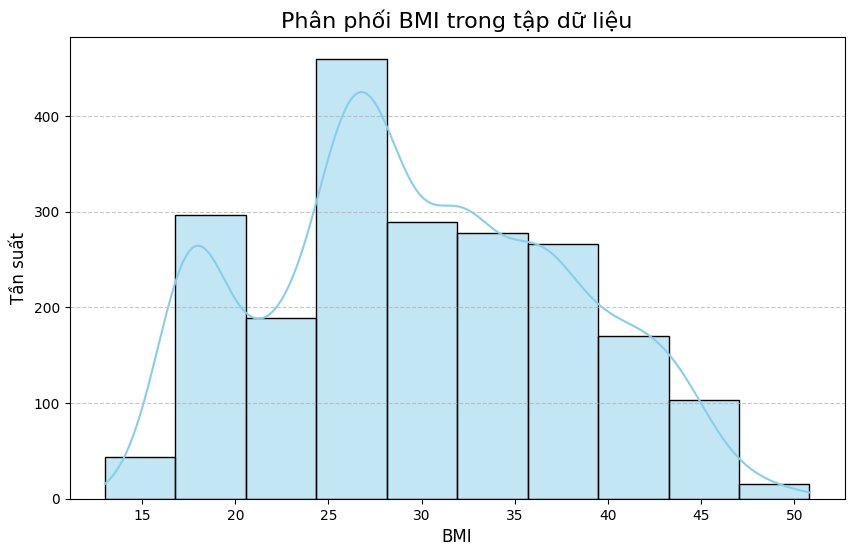

In [31]:
# Thiết lập biểu đồ phân phối BMI
plt.figure(figsize=(10, 6))
sb.histplot(df['BMI'], kde=True, bins=10, color='skyblue', edgecolor='black')
plt.title("Phân phối BMI trong tập dữ liệu", fontsize=16)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Tần suất", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()